In [1]:
%matplotlib notebook

import argparse
import torch
import matplotlib.pyplot as plt
from data import NoisyBSDSDataset
from argument import Args
from model import DnCNN, UDnCNN, DUDnCNN
import nntools as nt
from utils import DenoisingStatsManager, plot

In [2]:
args = Args()
args.plot = True

In [3]:
vars(args)

{'root_dir': '../dataset/BSDS300/images',
 'output_dir': '../checkpoints/',
 'num_epochs': 200,
 'D': 6,
 'C': 64,
 'plot': True,
 'model': 'dudncnn',
 'lr': 0.001,
 'image_size': (180, 180),
 'test_image_size': (320, 320),
 'batch_size': 4,
 'sigma': 30}

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# dataset
train_set = NoisyBSDSDataset(
    args.root_dir, image_size=args.image_size, sigma=args.sigma)
test_set = NoisyBSDSDataset(
    args.root_dir, mode='test', image_size=args.test_image_size, sigma=args.sigma)

# model
if args.model == 'dncnn':
    net = DnCNN(args.D, C=args.C).to(device)
elif args.model == 'udncnn':
    net = UDnCNN(args.D, C=args.C).to(device)
elif args.model == 'dudncnn':
    net = DUDnCNN(args.D, C=args.C).to(device)
else:
    raise NameError('Please enter: dncnn, udncnn, or dudncnn')

# optimizer
adam = torch.optim.Adam(net.parameters(), lr=args.lr)

# stats manager
stats_manager = DenoisingStatsManager()

# experiment
exp = nt.Experiment(net, train_set, test_set, adam, stats_manager, batch_size=args.batch_size,
                    output_dir=args.output_dir, perform_validation_during_training=True)

<IPython.core.display.Javascript object>


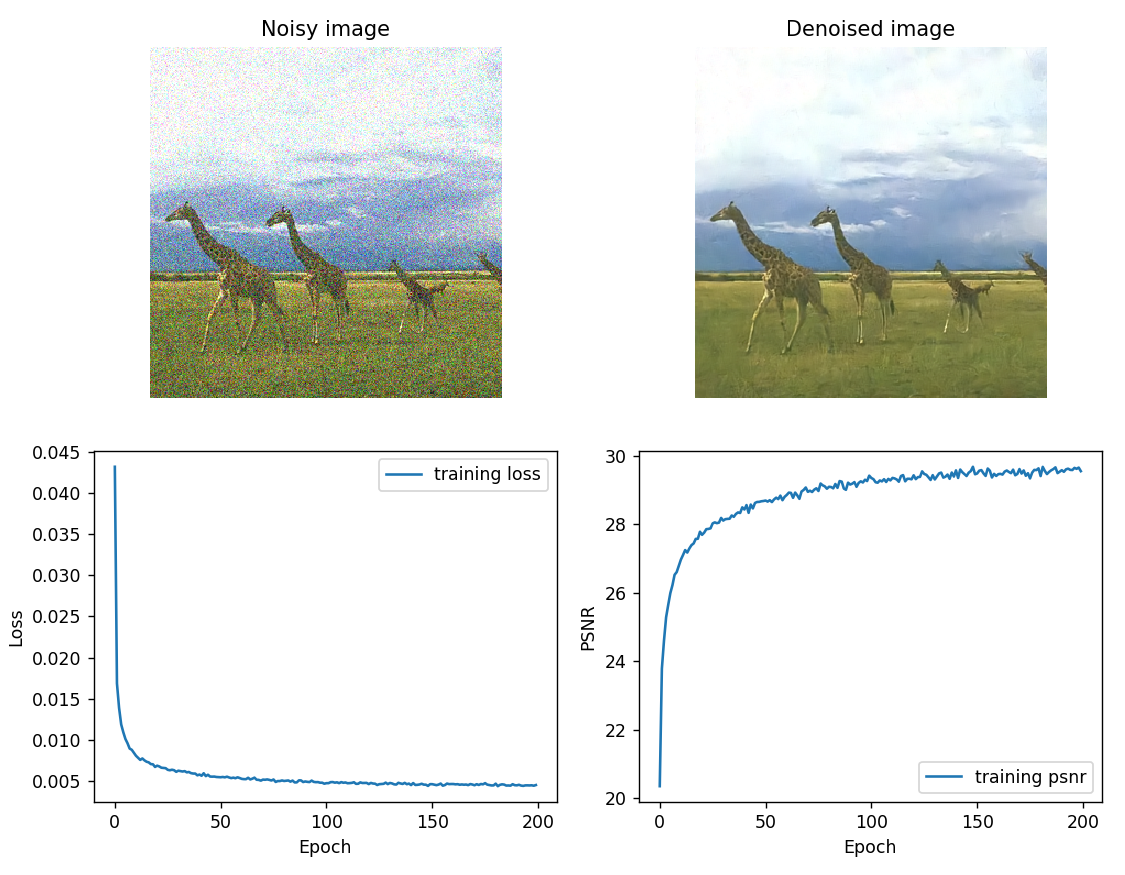

Start/Continue training from epoch 200
Finish training for 200 epochs


In [5]:
# run
if args.plot:
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 7))
    exp.run(num_epochs=args.num_epochs, plot=lambda exp: plot(exp, fig=fig, axes=axes,
                                                noisy=test_set[73][0]))
else:
    exp.run(num_epochs=args.num_epochs)